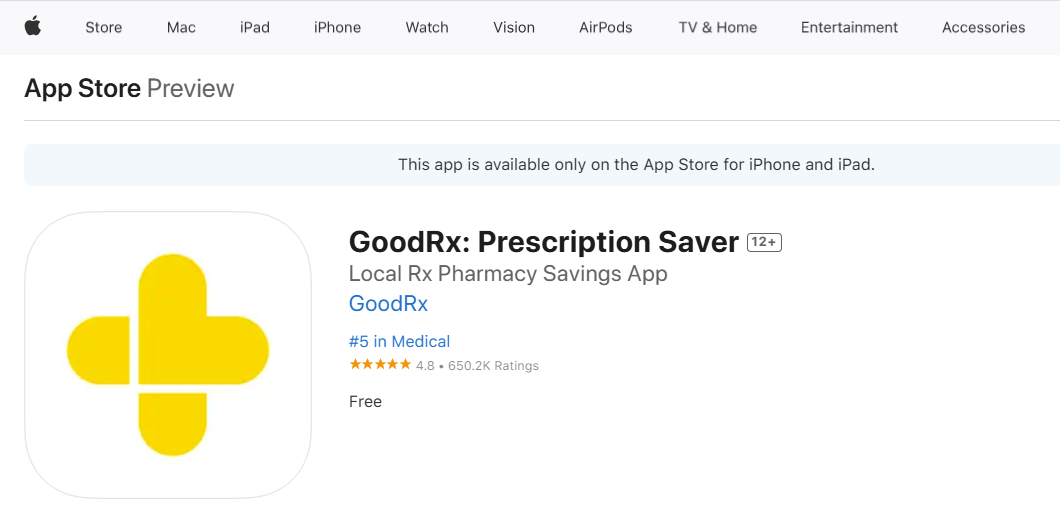

URL: https://apps.apple.com/us/app/goodrx-prescription-saver/id485357017

In [2]:
import pandas as pd
import numpy as np
import json

from app_store_scraper import AppStore

country = 'us'
app_name = 'goodrx'
app_id = '485357017'
num_reviews_to_get = 100

app = AppStore(country = country, app_name = app_name, app_id = app_id)
app.review(how_many=num_reviews_to_get)

2024-08-01 15:29:30,923 [INFO] Base - Initialised: AppStore('us', 'goodrx', 485357017)
2024-08-01 15:29:30,923 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/goodrx/id485357017
2024-08-01 15:29:33,797 [INFO] Base - [id:485357017] Fetched 100 reviews (100 fetched in total)


In [4]:
app.reviews

[{'date': datetime.datetime(2019, 4, 3, 21, 18, 18),
  'review': 'I absolutely love and recommend GoodRx! I lost my insurance in January and have now gotten my new insurance. During that time span I started using GoodRx. I couldn’t believe how cheap some of my medications were! I have been taking multiple medications for years and paying $20 copay on almost every script that I have and my husbands as well. While I have been using GoodRx I have been paying less than my copayments were on my medications. Now that I have insurance again idk if I should continue using GoodRx or use my insurance and pay my copayments. The reason being is that last year I met my out of pocket and had a zero copay on my medicines for several months, however my family out of pocket wasn’t met so my husbands copays still had to be met. I know I will facing many medical bills this year as well but I don’t know if I will meet my out of pocket though so I’m not sure what I’ll do yet. If you don’t have insurance th

In [6]:
app_df = pd.DataFrame(np.array(app.reviews),columns=['review'])
app_df2 = app_df.join(pd.DataFrame(app_df.pop('review').tolist()))
app_df2.head()

,date,review,rating,isEdited,title,userName,developerResponse
0,2019-04-03 21:18:18,I absolutely love and recommend GoodRx! I lost...,5,False,Better prices than using insurance!,P!nk's#1fan,NaN
1,2021-01-23 21:40:49,I am in recovery for a bad opiate problem I ha...,5,False,Good RX is a lifesaver,antbelicheck,NaN
2,2021-10-06 21:31:33,I have been purchasing prescriptions (and some...,5,False,Fantastic Savings Program and App!!!,Sheila H-R,NaN
3,2021-07-12 02:25:22,GoodRx advertises savings on drugs not covered...,2,False,What a workout to save money,Full-Time-Travelers,"{'id': 23908822, 'body': 'Hi there, we're sorr..."
4,2021-02-16 07:53:29,I have no Rx insurance and was denied assistan...,5,False,Great savings seriously even if insured,BC0092,NaN


In [17]:
app_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               100 non-null    datetime64[ns]
 1   review             100 non-null    object        
 2   rating             100 non-null    int64         
 3   isEdited           100 non-null    bool          
 4   title              100 non-null    object        
 5   userName           100 non-null    object        
 6   developerResponse  24 non-null     object        
 7   all_review         100 non-null    object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 5.7+ KB


In [12]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
import re

In [9]:
app_df2['all_review'] = app_df2['title'] + ' ' + app_df2['review']
fivestar_df = app_df2[app_df2['rating'] == 5]
fivestar_df.head()

,date,review,rating,isEdited,title,userName,developerResponse,all_review
0,2019-04-03 21:18:18,I absolutely love and recommend GoodRx! I lost...,5,False,Better prices than using insurance!,P!nk's#1fan,NaN,Better prices than using insurance! I absolute...
1,2021-01-23 21:40:49,I am in recovery for a bad opiate problem I ha...,5,False,Good RX is a lifesaver,antbelicheck,NaN,Good RX is a lifesaver I am in recovery for a ...
2,2021-10-06 21:31:33,I have been purchasing prescriptions (and some...,5,False,Fantastic Savings Program and App!!!,Sheila H-R,NaN,Fantastic Savings Program and App!!! I have be...
4,2021-02-16 07:53:29,I have no Rx insurance and was denied assistan...,5,False,Great savings seriously even if insured,BC0092,NaN,Great savings seriously even if insured I have...
5,2020-07-14 23:01:50,Have saved literally hundreds and hundreds and...,5,False,I’m very impressed!!!,v manderson,NaN,I’m very impressed!!! Have saved literally hun...


In [18]:
fivestar_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               84 non-null     datetime64[ns]
 1   review             84 non-null     object        
 2   rating             84 non-null     int64         
 3   isEdited           84 non-null     bool          
 4   title              84 non-null     object        
 5   userName           84 non-null     object        
 6   developerResponse  11 non-null     object        
 7   all_review         84 non-null     object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 5.3+ KB


In [42]:
# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Add 'goodrx' and 'good rx' to the stopwords
stop_words.update(['goodrx', 
                   'good rx', 
                   'app', 
                   'doctor', 
                   'dr', 
                   'rx', 
                   'good', 
                   'drug', 
                   'medication',
                   'medications',
                  'dont',
                  'prescription',
                   'prescriptions',
                  'thank',
                  'pharmacy',
                  'app'])

# Function to process text
def process_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords and custom words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Remove any remaining non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vladc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(fivestar_df['all_review'].apply(process_text))
tfidf_matrix

<84x1821 sparse matrix of type '<class 'numpy.float64'>'
	with 4910 stored elements in Compressed Sparse Row format>

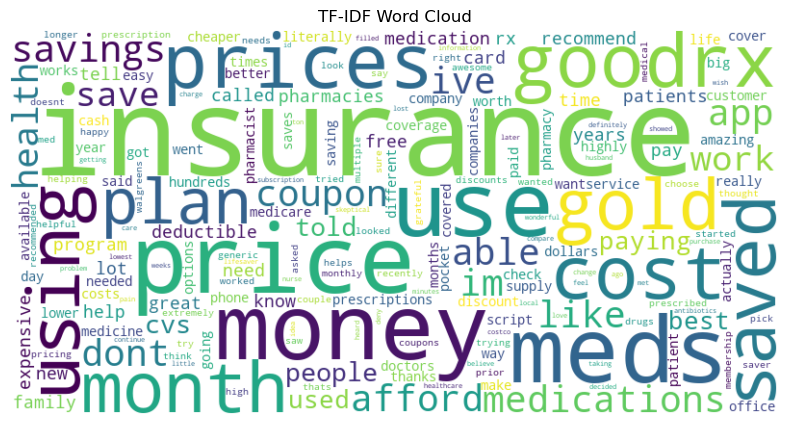

In [44]:
# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Sum TF-IDF scores for each word across all documents
word_scores = tfidf_matrix.sum(axis=0).A1
word_dict = dict(zip(feature_names, word_scores))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TF-IDF Word Cloud')
plt.show()

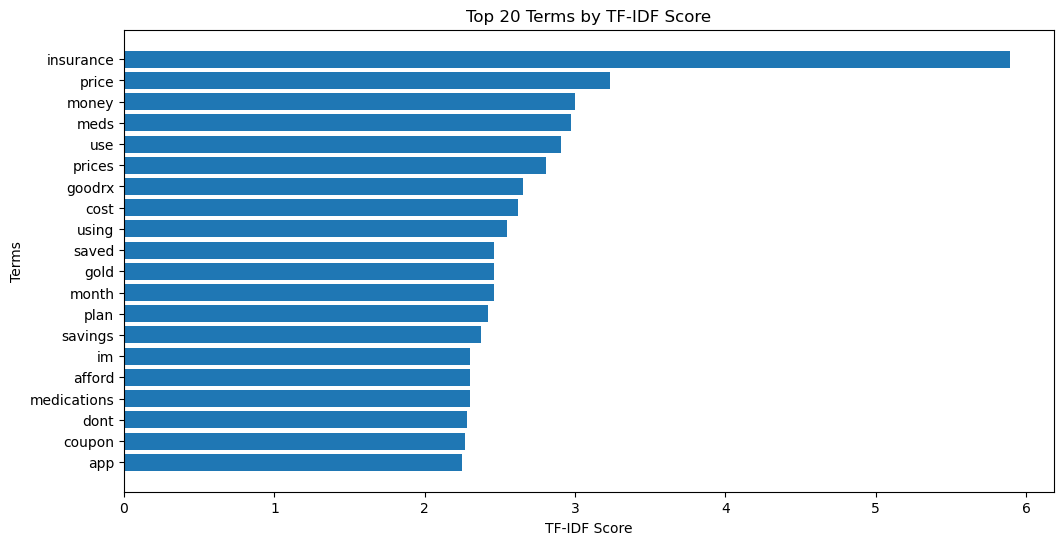

In [45]:
# Get top N terms
N = 20
top_indices = np.argsort(word_scores)[-N:]
top_terms = feature_names[top_indices]
top_scores = word_scores[top_indices]

plt.figure(figsize=(12, 6))
plt.barh(top_terms, top_scores)
plt.title(f'Top {N} Terms by TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Terms')
plt.show()